In [122]:
import pandas as pd
import numpy as np

tdata = pd.read_csv("tdata2.csv")

In [123]:
tdata.head()

Trip ID    Trip Start Timestamp  \
0  0003bbcd934e38da460749062b7b58ba02529e81  11/01/2020 12:00:00 AM   
1  000ad28aed5cdb660a1332ef0061d8782e23409c  11/01/2020 12:00:00 AM   
2  001b36e51fec896fb5aef60741b1bcf27c8b4fb2  11/01/2020 12:00:00 AM   
3  002c55b7ae1589b08ce275a1346a06378099a81f  11/01/2020 12:00:00 AM   
4  003093710bb47cd0a3de34d98b97dfd3d22f9e3f  11/01/2020 12:00:00 AM   

       Trip End Timestamp  Trip Seconds  Trip Miles  Pickup Census Tract  \
0  11/01/2020 12:15:00 AM         779.0         4.4                  NaN   
1  11/01/2020 12:00:00 AM         448.0         1.4         1.703128e+10   
2  11/01/2020 12:15:00 AM         573.0         5.4         1.703132e+10   
3  11/01/2020 12:15:00 AM        1047.0         4.4         1.703184e+10   
4  11/01/2020 12:15:00 AM         820.0         4.7                  NaN   

   Dropoff Census Tract  Pickup Community Area  Dropoff Community Area  Fare  \
0                   NaN                   35.0                    41.0  10.0   
1          1.703183e+10                   28.0                    28.0   7.5   
2          1.703106e+10                   32.0                     6.0  12.5   
3          1.703106e+10                   24.0                     6.0  10.0   
4                   NaN                   71.0                    66.0   7.5   

   ...  Additional Charges  Trip Total  Shared Trip Authorized  Trips Pooled  \
0  ...                1.23       12.23                   False             1   
1  ...                1.23        8.73                   False             1   
2  ...                3.10       18.60                   False             1   
3  ...                3.10       13.10                   False             1   
4  ...                3.10       10.60                   False             1   

   Pickup Centroid Latitude  Pickup Centroid Longitude  \
0                 41.835118                 -87.618678   
1                 41.885300                 -87.642808   
2                 41.884987                 -87.620993   
3                 41.898306                 -87.653614   
4                 41.744205                 -87.656306   

               Pickup Centroid Location Dropoff Centroid Latitude  \
0  POINT (-87.6186777673 41.8351179863)                 41.794090   
1  POINT (-87.6428084655 41.8853000224)                 41.871689   
2  POINT (-87.6209929134 41.8849871918)                 41.938391   
3  POINT (-87.6536139825 41.8983058696)                 41.945282   
4  POINT (-87.6563059862 41.7442051463)                 41.771849   

   Dropoff Centroid Longitude             Dropoff Centroid Location  
0                  -87.592311    POINT (-87.592310855 41.794090253)  
1                  -87.654093  POINT (-87.6540926517 41.8716894745)  
2                  -87.638575  POINT (-87.6385749205 41.9383912577)  
3                  -87.661545  POINT (-87.6615450961 41.9452823311)  
4                  -87.695666   POINT (-87.695666342 41.7718485152)  

[5 rows x 21 columns]

In [124]:
pdata = tdata["Pickup Census Tract"]

In [125]:
pdata = pdata.dropna()

In [126]:
pickup_data = pdata.value_counts().reset_index()

In [127]:
pickup_data.astype(int)

index  Pickup Census Tract
0    17031980000                 9661
1    17031839100                 9490
2    17031320100                 6997
3    17031081800                 6054
4    17031833000                 5392
..           ...                  ...
922  17031770902                    1
923  17031660301                    1
924  17031823903                    1
925  17031815000                    1
926  17031720500                    1

[927 rows x 2 columns]

In [128]:
pickup_data.columns = ["GEOID","Pickup"]

In [129]:
pickup_data

GEOID  Pickup
0    1.703198e+10    9661
1    1.703184e+10    9490
2    1.703132e+10    6997
3    1.703108e+10    6054
4    1.703183e+10    5392
..            ...     ...
922  1.703177e+10       1
923  1.703166e+10       1
924  1.703182e+10       1
925  1.703182e+10       1
926  1.703172e+10       1

[927 rows x 2 columns]

In [130]:
pickup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GEOID   927 non-null    float64
 1   Pickup  927 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 14.6 KB


In [131]:
import folium
import geopandas as gpd

geodata = gpd.read_file("shapes.geojson")

In [132]:
geodata = geodata[geodata["GEOID"].notna()]
geodata = geodata.astype({"GEOID":"int"}) 

In [133]:
geodata = geodata[geodata["GEOID"].isin(pickup_data["GEOID"])]
geodata = geodata.to_crs(epsg = 4326)

In [134]:
geodata.head()

STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID  NAME LSAD  \
0      17      031  843800  1400000US17031843800  17031843800  8438   CT   
2      17      031  243000  1400000US17031243000  17031243000  2430   CT   
3      17      031  250600  1400000US17031250600  17031250600  2506   CT   
4      17      031  251700  1400000US17031251700  17031251700  2517   CT   
5      17      031  260400  1400000US17031260400  17031260400  2604   CT   

     ALAND  AWATER                                           geometry  
0  1309516       0  POLYGON ((-87.64554 41.80886, -87.64068 41.808...  
2   324548       0  POLYGON ((-87.68195 41.89583, -87.67950 41.895...  
3   647765       0  POLYGON ((-87.77560 41.90925, -87.77536 41.909...  
4   486655       0  POLYGON ((-87.74826 41.89498, -87.74645 41.895...  
5   328225       0  POLYGON ((-87.74061 41.88781, -87.73571 41.887...

In [135]:
Chicago_Map = folium.Map(location = [41.8,-87.6])
Chicago_Map

In [136]:
folium.Choropleth(
    geo_data=geodata,
    name="choropleth",
    data=pickup_data,
    columns=["GEOID","Pickup"],
#     threshold_scale = [0,1000,5000,10000,20000,50000,80000,100000],
    key_on="feature.properties.GEOID",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Pickups by Census Tract",
).add_to(Chicago_Map)

folium.LayerControl().add_to(Chicago_Map)


Chicago_Map

In [137]:
median_income = pd.read_csv("MedianIncome.csv")

In [138]:
median_income.head()

Unnamed: 0        GEOID  MedianIncome
0           1  17031010100         63138
1           2  17031010201         41125
2           3  17031010202         45236
3           4  17031010300         72917
4           5  17031010400         58438

In [139]:
median_income = median_income.drop([0])

In [140]:
median_income.dropna()

Unnamed: 0        GEOID  MedianIncome
1              2  17031010201         41125
2              3  17031010202         45236
3              4  17031010300         72917
4              5  17031010400         58438
5              6  17031010501         52747
...          ...          ...           ...
1313        1315  17031843800         41250
1314        1316  17031843900         50104
1315        1317  17031980000             0
1316        1318  17031980100             0
1317        1319  17031990000             0

[1317 rows x 3 columns]

In [141]:
median_income.columns[2]

'MedianIncome'

In [142]:
median_income

Unnamed: 0        GEOID  MedianIncome
1              2  17031010201         41125
2              3  17031010202         45236
3              4  17031010300         72917
4              5  17031010400         58438
5              6  17031010501         52747
...          ...          ...           ...
1313        1315  17031843800         41250
1314        1316  17031843900         50104
1315        1317  17031980000             0
1316        1318  17031980100             0
1317        1319  17031990000             0

[1317 rows x 3 columns]

In [143]:
median_income.head()

Unnamed: 0        GEOID  MedianIncome
1           2  17031010201         41125
2           3  17031010202         45236
3           4  17031010300         72917
4           5  17031010400         58438
5           6  17031010501         52747

In [144]:
median_income.tail()

Unnamed: 0        GEOID  MedianIncome
1313        1315  17031843800         41250
1314        1316  17031843900         50104
1315        1317  17031980000             0
1316        1318  17031980100             0
1317        1319  17031990000             0

In [145]:
median_income = median_income[["GEOID","MedianIncome"]]

In [146]:
median_income.dropna()

GEOID  MedianIncome
1     17031010201         41125
2     17031010202         45236
3     17031010300         72917
4     17031010400         58438
5     17031010501         52747
...           ...           ...
1313  17031843800         41250
1314  17031843900         50104
1315  17031980000             0
1316  17031980100             0
1317  17031990000             0

[1317 rows x 2 columns]

In [147]:
median_income = median_income[median_income["GEOID"] != ""]

In [148]:
median_income = median_income[median_income["MedianIncome"] != "-"]

In [149]:
median_income

GEOID  MedianIncome
1     17031010201         41125
2     17031010202         45236
3     17031010300         72917
4     17031010400         58438
5     17031010501         52747
...           ...           ...
1313  17031843800         41250
1314  17031843900         50104
1315  17031980000             0
1316  17031980100             0
1317  17031990000             0

[1317 rows x 2 columns]

In [150]:
median_income = median_income.astype({"GEOID":"int"})
median_income

GEOID  MedianIncome
1     17031010201         41125
2     17031010202         45236
3     17031010300         72917
4     17031010400         58438
5     17031010501         52747
...           ...           ...
1313  17031843800         41250
1314  17031843900         50104
1315  17031980000             0
1316  17031980100             0
1317  17031990000             0

[1317 rows x 2 columns]

In [151]:
median_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 1 to 1317
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GEOID         1317 non-null   int64
 1   MedianIncome  1317 non-null   int64
dtypes: int64(2)
memory usage: 30.9 KB


In [152]:
median_income[median_income["GEOID"].isin(pickup_data["GEOID"])]

GEOID  MedianIncome
1     17031010201         41125
2     17031010202         45236
3     17031010300         72917
4     17031010400         58438
5     17031010501         52747
...           ...           ...
1312  17031843700        194375
1313  17031843800         41250
1314  17031843900         50104
1315  17031980000             0
1316  17031980100             0

[925 rows x 2 columns]

In [153]:
median_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 1 to 1317
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GEOID         1317 non-null   int64
 1   MedianIncome  1317 non-null   int64
dtypes: int64(2)
memory usage: 30.9 KB


In [154]:
Income_Map = folium.Map(location = [41.8,-87.6])
Income_Map

In [155]:
folium.Choropleth(
    geo_data=geodata,
    name="choropleth",
    data=median_income,
    columns=["GEOID","MedianIncome"],
#     threshold_scale = [0,1000,5000,10000,20000,50000,80000,100000],
    key_on="feature.properties.GEOID",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Pickups by Census Tract",
).add_to(Income_Map)

folium.LayerControl().add_to(Income_Map)


Income_Map

In [156]:
combined_df = pd.merge(median_income,pickup_data)

In [157]:
combined_df.head()

GEOID  MedianIncome  Pickup
0  17031010201         41125     305
1  17031010202         45236     233
2  17031010300         72917     280
3  17031010400         58438     240
4  17031010501         52747     234

In [158]:
from simpledbf import Dbf5

dbf = Dbf5("Data_Austin.dbf")

In [159]:
more_data = dbf.to_dataframe()

In [160]:
combined_df.describe()

GEOID   MedianIncome       Pickup
count  9.250000e+02     925.000000   925.000000
mean   1.703147e+10   83097.527568   258.009730
std    2.981447e+05   54067.674400   778.952241
min    1.703101e+10       0.000000     1.000000
25%    1.703120e+10   44875.000000    12.000000
50%    1.703146e+10   66731.000000    47.000000
75%    1.703181e+10  106375.000000   167.000000
max    1.703198e+10  250000.000000  9661.000000

In [161]:
d4a = more_data[["GEOID10", "D4A"]]

In [162]:
d4a.columns = ["GEOID", "D4A"]
d4a

GEOID       D4A
0     170318134001    276.27
1     170318205022    441.23
2     170316720003    156.91
3     170315608003    319.19
4     171118706042   1105.08
...            ...       ...
6903  550590030012 -99999.00
6904  550590008003 -99999.00
6905  550590027001 -99999.00
6906  550590021002 -99999.00
6907  550590001003 -99999.00

[6908 rows x 2 columns]

In [165]:
d4a["GEOID"] = d4a["GEOID"].str[:-1]

/var/folders/zc/cc95gj757jqdfmtj7lsf19j00000gn/T/ipykernel_8664/645360293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d4a["GEOID"] = d4a["GEOID"].str[:-1]


In [166]:
d4a

GEOID       D4A
0     17031813400    276.27
1     17031820502    441.23
2     17031672000    156.91
3     17031560800    319.19
4     17111870604   1105.08
...           ...       ...
6903  55059003001 -99999.00
6904  55059000800 -99999.00
6905  55059002700 -99999.00
6906  55059002100 -99999.00
6907  55059000100 -99999.00

[6908 rows x 2 columns]

In [180]:
d4a = d4a[d4a["D4A"] >= 0]

In [181]:
d4a["GEOID"] = d4a["GEOID"].astype("int")

In [182]:
d4a.describe()

GEOID          D4A
count  2.687000e+03  2687.000000
mean   1.703148e+10   293.073870
std    3.018835e+05   165.126107
min    1.703101e+10     0.000000
25%    1.703119e+10   195.130000
50%    1.703153e+10   258.840000
75%    1.703181e+10   358.080000
max    1.703198e+10  1207.000000

In [183]:
d4a = d4a[d4a["GEOID"].isin(pickup_data["GEOID"])]

In [184]:
combined_df = pd.merge(combined_df,d4a)

In [185]:
combined_df

GEOID  MedianIncome  Pickup     D4A
0     17031010201         41125     305  332.60
1     17031010201         41125     305  223.97
2     17031010201         41125     305  146.18
3     17031010202         45236     233  308.46
4     17031010202         45236     233   79.13
...           ...           ...     ...     ...
2718  17031843900         50104     261  207.87
2719  17031843900         50104     261  154.23
2720  17031843900         50104     261   73.76
2721  17031843900         50104     261  296.39
2722  17031980000             0    9661  615.57

[2723 rows x 4 columns]

In [186]:
D4A_Map = folium.Map(location = [41.8,-87.6])
D4A_Map

In [193]:
folium.Choropleth(
    geo_data=geodata,
    name="choropleth",
    data= combined_df,
    columns=["GEOID","D4A"],
#     threshold_scale = [0,1000,5000,10000,20000,50000,80000,100000],
    key_on="feature.properties.GEOID",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="D4A",
).add_to(D4A_Map)

folium.LayerControl().add_to(D4A_Map)


D4A_Map

<function matplotlib.pyplot.show(close=None, block=None)>

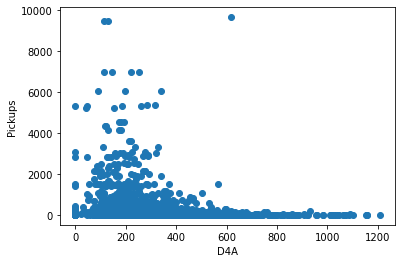

In [195]:
import matplotlib.pyplot as plt


plt.scatter(combined_df["D4A"],combined_df["Pickup"],)
plt.xlabel("D4A")
plt.ylabel("Pickups")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

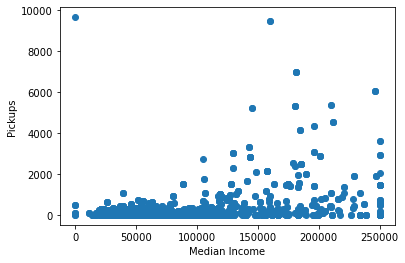

In [196]:
plt.scatter(combined_df["MedianIncome"],combined_df["Pickup"])
plt.xlabel("Median Income")
plt.ylabel("Pickups")
plt.show

In [201]:
more_data.columns

Index(['GEOID10', 'GEOID20', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE',
       'CSA', 'CSA_Name', 'CBSA', 'CBSA_Name',
       ...
       'Com_VMT_Pe', 'VMT_per_wo', 'VMT_tot_mi', 'VMT_tot_ma', 'VMT_tot_av',
       'GHG_per_wo', 'Annual_GHG', 'SLC_score', 'Shape_Leng', 'Shape_Area'],
      dtype='object', length=181)